<a href="https://colab.research.google.com/github/ZazzyDictionary/SPY-experiment/blob/main/portfolios_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# taken from https://www.codingfinance.com/post/2018-04-25-portfolio-beta-py/ 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns

In [85]:
tickers = ['TSLA','AAPL','FB','PLTR']
wts = [0.25]*4 #weightages on portfolio


In [86]:
price_data = web.get_data_yahoo(tickers,
                               start = '2018-01-01',
                               end = '2021-02-23')
price_data = price_data['Adj Close']

In [87]:
ret_data = price_data.pct_change()[1:]

In [77]:
port_ret = (ret_data * wts).sum(axis = 1)
port_ret

Date
2020-01-03    0.003655
2020-01-06    0.011514
2020-01-07    0.009065
2020-01-08    0.018857
2020-01-09    0.003402
                ...   
2021-02-17   -0.010995
2021-02-18   -0.026985
2021-02-19    0.029153
2021-02-22   -0.038621
2021-02-23   -0.011607
Length: 287, dtype: float64

In [88]:
benchmark_price = web.get_data_yahoo('SPY',
                               start = '2018-01-01',
                               end = '2021-02-23')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

In [79]:
benchmark_ret

Date
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
2020-01-09    0.006781
                ...   
2021-02-17    0.000229
2021-02-18   -0.004256
2021-02-19   -0.001766
2021-02-22   -0.007692
2021-02-23    0.001214
Name: Adj Close, Length: 287, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


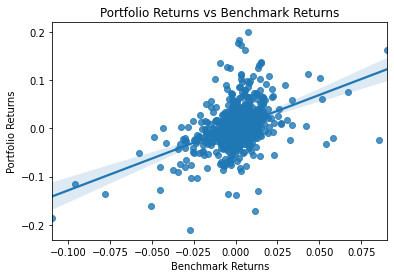

In [89]:
sns.regplot(benchmark_ret.values,port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [91]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.3168


In [92]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is 0.0031
